In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
data = pd.read_csv("../input/train.csv")

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
X = data.iloc[:,1:]
y = data.iloc[:,0]


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score    

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [7]:
pcs = PCA()
pca_values = pcs.fit_transform(X)
pc = pd.DataFrame(pca_values)
#print(pcs.explained_variance_ratio_)


In [8]:
var = pcs.explained_variance_ratio_ #The amount of variance explained by each of the selected components.
#var
pccomp = pd.DataFrame(pcs.components_) #weights
#pccomp
#cumulative variance percentage
cumvar = np.cumsum(np.round(var, decimals = 4) * 100)#decimal atleast 3 or 4
#cumvar

In [9]:
#var

In [10]:
#pccomp

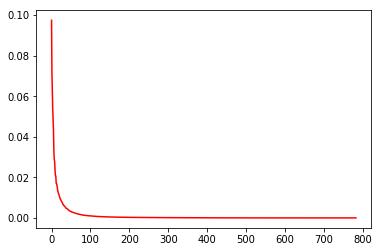

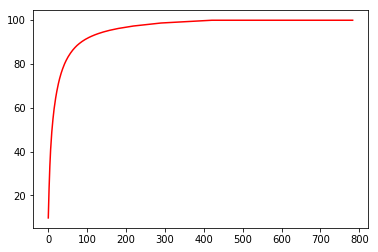

In [11]:
plt.plot(var, color = "red")
plt.show()
plt.plot(cumvar, color = "red")
plt.show()

In [12]:
pd.DataFrame(pca_values).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,-661.595780,-699.311328,183.282040,120.611394,-81.081811,489.461886,-683.470838,85.559387,348.548052,202.978545,-364.559949,21.265756,404.441449,-97.052545,61.839936,-86.780027,17.658144,285.484696,18.827303,207.642731,44.243600,221.894370,57.227459,-148.674962,14.343589,-41.556031,-333.723659,208.978881,59.813631,84.554465,6.942931,-5.299951,195.709336,-53.229229,-6.889599,-146.886583,-49.406623,-88.063980,-161.589210,-140.787617,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.0,0.0,0.0,0.0,7.555324e-12,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00
1,1701.451685,-360.551556,-501.805594,335.423656,-442.378933,738.404049,653.875438,-176.600677,-7.520175,67.846273,34.221804,46.551842,-70.435775,-342.692097,377.839952,-5.665827,317.765748,87.612618,-94.531168,-175.028270,-213.086598,-272.411966,7.167612,-22.635149,-34.608589,264.486976,-76.621928,14.026130,-80.427340,-87.684987,-27.822544,188.784153,115.953010,57.921695,-10.444786,-91.736397,-110.514502,-40.603347,111.846730,87.113136,...,2.726912e-14,1.388670e-13,-1.753962e-15,4.963752e-14,-7.352749e-14,-2.210639e-14,-5.027443e-14,1.218533e-13,-1.560454e-14,-8.978592e-14,-4.493049e-14,-2.037210e-14,1.418918e-14,-1.870591e-14,7.358788e-15,-1.323502e-14,-2.537293e-15,6.010843e-16,-3.274435e-15,2.028249e-15,2.159557e-15,-2.976887e-16,-1.544894e-15,-1.032665e-15,3.111916e-15,1.509073e-15,-2.483297e-16,-1.107793e-15,2.000480e-17,0.0,0.0,0.0,0.0,-4.937652e-14,-4.059050e-13,-2.542055e-14,-1.079961e-13,2.045778e-13,1.405856e-13,2.949243e-14
2,-886.894434,-293.765782,67.155310,78.263763,-473.715921,-323.540638,437.799098,-305.377740,-195.295503,-25.626023,367.595529,252.106647,54.557888,-58.590892,163.090574,-162.494140,-100.318548,-155.369350,70.204884,-182.797458,-104.940439,128.626995,152.009387,52.395723,-112.874077,88.143729,-229.586767,106.927395,-10.515132,121.363326,88.142594,40.686462,-48.921290,-118.051804,-16.874386,-1.796465,-51.819305,66.447343,-115.008861,-38.281560,...,1.128310e-13,9.236209e-14,6.308680e-14,1.456216e-13,1.255253e-13,-5.964189e-14,-1.171866e-15,5.192839e-14,-1.246491e-14,-4.733496e-14,-4.733828e-14,8.692229e-15,-1.110911e-14,2.250502e-14,3.155178e-15,1.694268e-15,-7.031829e-15,-5.195465e-15,3.293721e-15,1.062593e-15,-4.774870e-15,-5.893161e-17,4.935759e-16,9.140874e-16,3.126316e-16,-3.258539e-16,-1.062601e-16,3.807256e-16,-3.574899e-16,0.0,0.0,0.0,0.0,1.830530e-14,1.519754e-14,-1.747162e-13,1.167814e-13,1.009755e-13,-2.585386e-13,1.610934e-14


In [13]:
type(pca_values)
pcs = pd.DataFrame(pca_values)
pca_new_df = pd.DataFrame(pca_values[:,0:20])

X = pca_new_df

In [14]:
pca_new_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-661.595780,-699.311328,183.282040,120.611394,-81.081811,489.461886,-683.470838,85.559387,348.548052,202.978545,-364.559949,21.265756,404.441449,-97.052545,61.839936,-86.780027,17.658144,285.484696,18.827303,207.642731
1,1701.451685,-360.551556,-501.805594,335.423656,-442.378933,738.404049,653.875438,-176.600677,-7.520175,67.846273,34.221804,46.551842,-70.435775,-342.692097,377.839952,-5.665827,317.765748,87.612618,-94.531168,-175.028270
2,-886.894434,-293.765782,67.155310,78.263763,-473.715921,-323.540638,437.799098,-305.377740,-195.295503,-25.626023,367.595529,252.106647,54.557888,-58.590892,163.090574,-162.494140,-100.318548,-155.369350,70.204884,-182.797458


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [16]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [17]:
y_pred = model.predict(x_test)

In [18]:
accuracy_score(y_test, y_pred)
#Without PCA
#n_neighbors=5 - 0.9657142857142857
#n_neighbors=3 - 0.9672619047619048


#With PCA(100)
#n_neighbors=1 - 0.9683333333333334
#n_neighbors=3 - 0.9713095238095238
#n_neighbors=5 - 0.9708333333333333
#n_neighbors=7 - 0.97


#With PCA(50)
#n_neighbors=1 - 0.9722619047619048
#n_neighbors=3 - 0.9736904761904762
#n_neighbors=5 - 0.9732142857142857
#n_neighbors=7 - 0.9720238095238095

#With PCA(50)
#n_neighbors=1 - 0.9663095238095238
#n_neighbors=3 - 0.9678571428571429
#n_neighbors=5 - 0.9672619047619048
#n_neighbors=7 - 0.9646428571428571

0.9646428571428571

In [19]:
#classification_report (y_test, y_pred)

In [20]:
#confusion_matrix(y_test, y_pred)

In [21]:
#roc_auc_score(y_test, y_pred)


In [22]:
#roc_curve(y_test, y_pred)
